### Задание №6, вариант 3, тема 20

Подключаем необходимые библиотеки:

In [1]:
import pandas
import numpy as np
import io
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

Используем набор данных: Medical Cost Personal Datasets (Медицинские расходы Персональные наборы данных)

In [2]:
data = pandas.read_csv('C:\\Users\\79251\\Downloads\\insurance.csv')

Поставленные задачи:

Построить модель предсказания, оценить вклад каждого компонента. Есть
ли выбросы среди данных, какие? Применить алгоритмы кластеризации.
Что общего между объектами в каждом кластере?

Из работы №5 берем за целевой признак charges

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Разбиваем данные на классы для построения классификатора

In [13]:
data_sel = data.loc [:, data.columns.isin(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])]
data_sel = data_sel.dropna()
data_sel['sex'] = np.where(data_sel['sex'] == 'male', 0,1)
data_sel['smoker'] = np.where(data_sel['smoker'] == 'yes', 0,1) 
data_sel['region'] = np.where(data_sel['region'] == 'southwest', 0, data_sel['region'])
data_sel['region'] = np.where(data_sel['region'] == 'southeast', 1, data_sel['region'])
data_sel['region'] = np.where(data_sel['region'] == 'northeast', 2, data_sel['region'])
data_sel['region'] = np.where(data_sel['region'] == 'northwest', 3, data_sel['region'])
data_sel['charges'] = np.where(data_sel['charges'] >= np.mean(data_sel['charges']), 1, 0)

Сharges = data_sel.loc[:, data_sel.columns.isin(['charges'])]
X = data_sel.loc[:, data_sel.columns.isin(['age', 'smoker', 'sex', 'bmi', 'children', 'region', 'charges'])]

X_train, X_test, y_train, y_test = train_test_split(X, Сharges, test_size=0.3)

In [14]:
data_sel.head()

age  sex     bmi  children  smoker region  charges
0   19    1  27.900         0       0      0        1
1   18    0  33.770         1       1      1        0
2   28    0  33.000         3       1      1        0
3   33    0  22.705         0       1      3        1
4   32    0  28.880         0       1      3        0

In [15]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_train, y_train)

C:\Users\79251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(loss='log')

In [16]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

1.0

In [17]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
print("f1:"+str(np.average(cross_val_score(clf,X_test,y_test,cv=3, scoring="f1_micro"))))
print("accuracy:"+str(np.average(cross_val_score(clf,X_test,y_test,cv=3, scoring='accuracy'))))
print("recall:"+str(np.average(cross_val_score(clf,X_test,y_test,cv=2,scoring='recall'))))
print('precision:'+str(np.average(cross_val_score(clf,X_test,y_test,cv=2,scoring='precision'))))

f1:0.9975124378109452
accuracy:0.9975124378109452
recall:0.9920634920634921
precision:0.9920634920634921


C:\Users\79251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\79251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\79251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\79251\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

f1:0.84

accuracy:0.80

recall:0.5

precision:0.80

In [18]:
data_sel.head()

age  sex     bmi  children  smoker region  charges
0   19    1  27.900         0       0      0        1
1   18    0  33.770         1       1      1        0
2   28    0  33.000         3       1      1        0
3   33    0  22.705         0       1      3        1
4   32    0  28.880         0       1      3        0

In [19]:
# Нормализуем вещетвенные переменные

from sklearn.preprocessing import StandardScaler 

scale_features_std = StandardScaler() 
features_std = scale_features_std.fit_transform(data[['age', 'bmi', 'children', 'charges']]) 

data[['age', 'bmi', 'children', 'charges']] = features_std

In [20]:
# Обработаем категориальные признаки

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)

label.fit(data.smoker)
data.smoker = label.transform(data.smoker)

label.fit(data.region)
data.region = label.transform(data.region)

In [21]:
from sklearn.model_selection import train_test_split
train = data
target = data.charges
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print (N_train, N_test)

936 402


In [22]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
pca = PCA()
X_train=X_train.dropna()
X_train
X_pca = pca.fit(X_train)

In [24]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,train.columns)))

1 component: 26.27% of initial variance
0.489 x age + 0.003 x sex + 0.469 x bmi + 0.138 x children + 0.136 x smoker + 0.390 x region + 0.593 x charges
2 component: 22.95% of initial variance
0.312 x age + 0.024 x sex + -0.198 x bmi + 0.267 x children + 0.095 x smoker + -0.813 x region + 0.350 x charges
3 component: 17.43% of initial variance
-0.120 x age + 0.002 x sex + -0.128 x bmi + 0.945 x children + -0.046 x smoker + 0.223 x region + -0.155 x charges
4 component: 14.62% of initial variance
-0.698 x age + 0.031 x sex + 0.602 x bmi + 0.099 x children + 0.128 x smoker + -0.270 x region + 0.223 x charges
5 component: 13.6% of initial variance
-0.385 x age + 0.020 x sex + -0.598 x bmi + -0.081 x children + 0.312 x smoker + 0.254 x region + 0.570 x charges
6 component: 4.4% of initial variance
-0.021 x age + -0.999 x sex + 0.003 x bmi + 0.010 x children + 0.007 x smoker + -0.021 x region + 0.031 x charges
7 component: 0.73% of initial variance
-0.117 x age + 0.007 x sex + -0.064 x bmi + 

1 компонента ловит 26.27% дисперсии - наибольший вклад в нее вносит признак charges, т.к перед ним самый большой коэф. по модулю.

2 компонента ловит 22.95% дисперсии (вместе с 1 уже 49.22%) - наибольший вклад вносит region

3 - 17.43% (в сумме с первыми двумя - 66.65%), наибольший вклад - children

4 - 14.62% (1 + 2 + 3 + 4 = 81.27%), наибольший вклад в нее - age

5 - 13.6% (94.87, т.е 5 компонент уже достаточно для описания 90% дисперсии), наиб. вклад - bmi

6 - 4.4%, наибольший вклад - sex

7 - 0.73%, наибольший вклад - smoker

In [25]:
data.head()

age  sex       bmi  children  smoker  region   charges
0 -1.438764    0 -0.453320 -0.908614       1       3  0.298584
1 -1.509965    1  0.509621 -0.078767       0       2 -0.953689
2 -0.797954    1  0.383307  1.580926       0       2 -0.728675
3 -0.441948    1 -1.305531 -0.908614       0       1  0.719843
4 -0.513149    1 -0.292556 -0.908614       0       1 -0.776802

In [26]:
data.describe()

age          sex           bmi      children       smoker  \
count  1.338000e+03  1338.000000  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.853691e-16     0.505232 -1.869041e-16  2.721623e-17     0.204783   
std    1.000374e+00     0.500160  1.000374e+00  1.000374e+00     0.403694   
min   -1.509965e+00     0.000000 -2.412011e+00 -9.086137e-01     0.000000   
25%   -8.691547e-01     0.000000 -7.164063e-01 -9.086137e-01     0.000000   
50%   -1.474046e-02     1.000000 -4.320880e-02 -7.876719e-02     0.000000   
75%    8.396738e-01     1.000000  6.611572e-01  7.510793e-01     0.000000   
max    1.765289e+00     1.000000  3.685522e+00  3.240619e+00     1.000000   

            region       charges  
count  1338.000000  1.338000e+03  
mean      1.515695  3.070123e-17  
std       1.104885  1.000374e+00  
min       0.000000 -1.003557e+00  
25%       1.000000 -7.046504e-01  
50%       2.000000 -3.212089e-01  
75%       2.000000  2.783441e-01  
max       3.000000  4.171663e+00

Выбросы заметны у признака charges - это видно по 2 квартилю и max значению, а также виден выброс у параметра children и bmi.

Применим алгоритмы кластеризации.

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.9, figsize=(20, 20));

In [28]:
X= data.iloc[:, [0,1,2,3,4,5,6]].values

In [29]:
X

array([[-1.43876426,  0.        , -0.45332   , ...,  1.        ,
         3.        ,  0.2985838 ],
       [-1.50996545,  1.        ,  0.5096211 , ...,  0.        ,
         2.        , -0.95368917],
       [-0.79795355,  1.        ,  0.38330685, ...,  0.        ,
         2.        , -0.72867467],
       ...,
       [-1.50996545,  0.        ,  1.0148781 , ...,  0.        ,
         2.        , -0.96159623],
       [-1.29636188,  0.        , -0.79781341, ...,  0.        ,
         3.        , -0.93036151],
       [ 1.55168573,  0.        , -0.26138796, ...,  1.        ,
         1.        ,  1.31105347]])

In [30]:
from sklearn import preprocessing
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(data, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

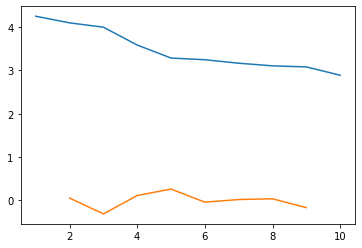

Рекомендованное количество кластеров: 5


In [31]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 8):
    kmeans_iter = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans_iter.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel("Число кластеров")
plt.ylabel("Cумма квадратов расстояний\nот точек до центроидов");

C:\Users\79251\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [33]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(X, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

In [34]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

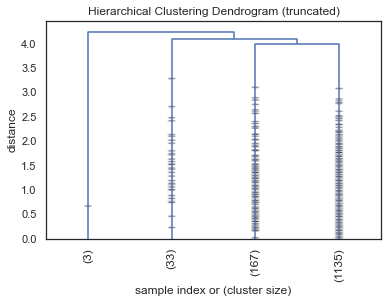

In [35]:
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=4, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [180]:
km = KMeans(n_clusters=4).fit(data)

In [181]:
km.labels_ +1

array([2, 2, 3, ..., 2, 2, 1])

In [203]:
data.head()

age  sex       bmi  children  smoker  region   charges  cluster
0 -1.438764    0 -0.453320 -0.908614       1       3  0.298584        2
1 -1.509965    1  0.509621 -0.078767       0       2 -0.953689        2
2 -0.797954    1  0.383307  1.580926       0       2 -0.728675        3
3 -0.441948    1 -1.305531 -0.908614       0       1  0.719843        2
4 -0.513149    1 -0.292556 -0.908614       0       1 -0.776802        2

In [184]:
data['cluster']=km.labels_+1
res=data.groupby('cluster').mean()
res['Количество']=data.groupby('cluster').size().values
res

age       sex       bmi  children    smoker    region   charges  \
cluster                                                                         
1        0.527418  0.484337 -0.354091  0.169187  0.154217  0.506024 -0.042076   
2       -1.090284  0.474255 -0.308403 -0.544291  0.102981  1.485095 -0.657420   
3        0.447798  0.506297  0.354545  0.312118  0.055416  2.539043 -0.248959   
4        0.036053  0.630573  0.764292  0.042803  0.955414  1.668790  2.285899   

         Количество  
cluster              
1               415  
2               369  
3               397  
4               157

Из таблицы видно, что во втором кластере находятся самые молодые бенефициары, так же в этом же кластере наблюдается отрицательное среднее значение параметра children - это значит, что у данного кластера индивиды скорее не имеют детей. Также во 2-ом кластере меньше всего по сумме страховых расходов. 

В первом кластере находятся самые старшие бенефициары, у которых самый низкий индекс массы теле, среди других кластеров. 

В третий кластер попали люди с большим кол-вом детей, и что интересно - эта группа людей расположенна в южной части США. 

В четвертый кластер попало подавляющее число курящих, с превышающим индексом тела. Также в этом кластере больше всего страховых расходов на лечение, что логично, исходя из нашего анализа. 

In [199]:
data.describe()

age          sex           bmi      children       smoker  \
count  1.338000e+03  1338.000000  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.853691e-16     0.505232 -1.869041e-16  2.721623e-17     0.204783   
std    1.000374e+00     0.500160  1.000374e+00  1.000374e+00     0.403694   
min   -1.509965e+00     0.000000 -2.412011e+00 -9.086137e-01     0.000000   
25%   -8.691547e-01     0.000000 -7.164063e-01 -9.086137e-01     0.000000   
50%   -1.474046e-02     1.000000 -4.320880e-02 -7.876719e-02     0.000000   
75%    8.396738e-01     1.000000  6.611572e-01  7.510793e-01     0.000000   
max    1.765289e+00     1.000000  3.685522e+00  3.240619e+00     1.000000   

            region       charges      cluster  
count  1338.000000  1.338000e+03  1338.000000  
mean      1.515695 -6.007485e-17     2.221226  
std       1.104885  1.000374e+00     1.013933  
min       0.000000 -1.003557e+00     1.000000  
25%       1.000000 -7.046504e-01     1.000000  
50%       2.000000 -3.212089e-01     2.000000  
75%       2.000000  2.783441e-01     3.000000  
max       3.000000  4.171663e+00     4.000000

In [186]:
cluster1 = data[data['cluster']==1]
cluster1 = data[data['cluster']==2]
cluster1 = data[data['cluster']==3]
cluster1 = data[data['cluster']==4]

In [202]:
data.sample(20)

age  sex       bmi  children  smoker  region   charges  cluster
166  -1.367563    0  1.039485  3.240619       0       3 -0.697187        3
818   0.554869    0 -0.744499 -0.078767       1       0  0.836884        1
429  -0.869155    0 -0.043209  1.580926       0       1  0.457175        1
433   1.480485    0 -0.026804 -0.908614       0       3 -0.052227        3
1279 -1.011557    0 -0.635409  0.751079       0       1 -0.750181        2
642   1.551686    1  0.533408 -0.908614       0       0 -0.010455        1
1227  0.198863    1  1.069013  0.751079       0       2 -0.504599        3
754  -1.082758    1  0.486655  2.410772       0       0  0.318699        1
1116  0.127662    1 -0.167883  3.240619       0       0 -0.334395        1
1133  0.910875    0 -2.022405 -0.908614       0       1 -0.270901        1
596   0.198863    0 -0.194130  0.751079       0       2 -0.465088        3
724   0.768473    0 -0.588657 -0.078767       0       0 -0.261393        1
59   -0.370746    0  1.094440  0.751079       0       1 -0.601455        1
1076  0.554869    0  0.219262 -0.078767       0       3 -0.389830        3
249  -0.726752    1 -0.276972 -0.078767       0       0 -0.762453        1
392   0.626070    1  0.128218 -0.078767       0       0 -0.355736        1
840  -1.296362    1  0.071622 -0.908614       0       3 -0.970148        2
887  -0.228344    0 -0.105546 -0.908614       0       1 -0.660713        2
148   0.982076    0  1.110024 -0.078767       0       1 -0.190883        1
70   -0.869155    0 -0.970060 -0.908614       1       2  0.273211        2